# Задача 1

Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: Р0=13 МПа; t0=540 °С; Рк=5 кПа. Параметры промперегрева: Рпп=1, 2, 3, 4, 5, 6 МПа; tпп=540 °С.

In [1]:
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [3]:
p_0 = 13 * MPa
t_0 = to_kelvin(540)
p_k = 5 * kPa
p_middle = [1, 2, 3, 4, 5, 6]
t_middle = to_kelvin(540)

In [6]:
def effpp (p_0, t_0, p_k, p_middle, t_middle):
    p_middle *= kPa
    point_0_start = gas(P = p_0 * unit, T = t_0)
    point_0_end = gas(P=p_middle * unit, s=point_0_start.s)
    point_1_start = gas(P=p_middle * unit, T=t_middle)
    point_condenser = gas(P=p_k * unit, s=point_1_start.s)
    point_pump = gas(P=p_k * unit, x=0)
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = round(useful_energy/full_energy*100,3)    
    return efficiency

In [7]:
efficiency = []
for pm_value in p_middle:
    efficiency.append(effpp(p_0, t_0, p_k, pm_value, t_middle))
efficiency

[17.584, 23.257, 26.198, 28.123, 29.528, 30.62]

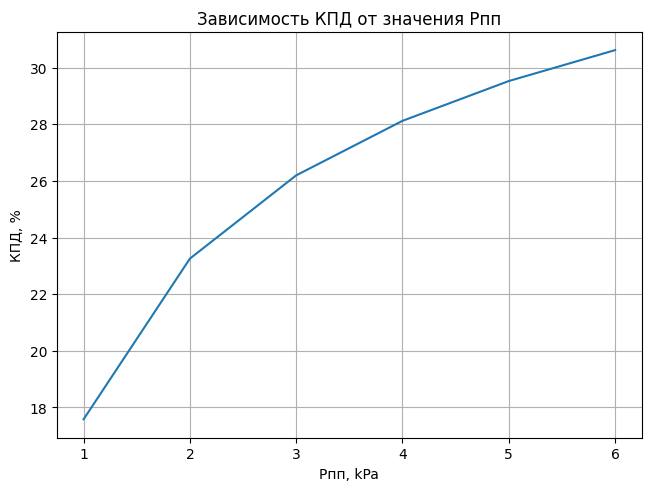

In [9]:
x = p_middle
plt.figure(layout = 'constrained')
plt.plot(x, efficiency)  
plt.xlabel('Pпп, kPa')
plt.ylabel('КПД, %')
plt.title("Зависимость КПД от значения Pпп")
plt.grid()